Recitation 11; Optimization
====

4/11/18

Note: Starting with this homework, you should be commenting your code in homeworks. Work is getting to be more code based, and if you want credit (or partial credit) you need to explain your work.

Optimization
=====
----

#### Check [here](https://nbviewer.jupyter.org/github/whitead/numerical_stats/blob/master/unit_11/lectures/lecture_1.ipynb) for optimization lecture notes

Optimization techniques:

* Root Finding
  * [Newton's Method](https://nbviewer.jupyter.org/github/whitead/numerical_stats/blob/master/unit_11/lectures/lecture_1.ipynb#Newton's-Method) - `newton`
  * [Powell Hybrid](https://nbviewer.jupyter.org/github/whitead/numerical_stats/blob/master/unit_11/lectures/lecture_1.ipynb#Powell-hybrid-method) - `root`
  * [Brent](https://nbviewer.jupyter.org/github/whitead/numerical_stats/blob/master/unit_11/lectures/lecture_2.ipynb#Brent's-Method) - `brentq` (Will learn next lecture) 


* Minimization 
  * [BFGS](https://nbviewer.jupyter.org/github/whitead/numerical_stats/blob/master/unit_11/lectures/lecture_1.ipynb#BFGS) - `minimize`
  * [Basin-hopping](https://nbviewer.jupyter.org/github/whitead/numerical_stats/blob/master/unit_11/lectures/lecture_2.ipynb#Basin-Hopping) - `basinhopping` (Will learn next lecture - for non-convex functions)
  * [SLSQP](https://nbviewer.jupyter.org/github/whitead/numerical_stats/blob/master/unit_11/lectures/lecture_2.ipynb#Sequential Least SQuares Programming (SLSQP) - `minimize` (Will learn next lecture)
  
*Non Convex functions have more than one root/derivative of 0
<newline>*If you are unsure of whether the function is non-convex or not, graph it
<newline>*If you are unsure of what initial estimate to give for x0, graph the function=0, estimate x where y=0
## Choosing which method to use
What to consider when optimizing: [from notes](https://nbviewer.jupyter.org/github/whitead/numerical_stats/blob/master/unit_11/lectures/lecture_1.ipynb#Choosing-which-method-to-use)

* Is it 1 or N dimensions?
* Are you minimizing or root-finding?
* Are there constraints?
* Are there bounds?
* Is it convex or non-convex?

Problem 1: Root Finding
====

For each question, determine which optimization method to use and find the roots of the given equation(s)

**1.** 
<center> Find the roots of <center> 
$$x^3 + 3x^2 - 5 = x + 10$$

**2.** 
<center>Use lambda to find the root(s) of <center>
$$\cos\left({\frac{z^2}{4}}\right) = z+2$$



**3.** 
<center> Define and use a function to find the root(s) of <center>
\begin{align*}
    3x + 2y &= 9\\
    4x^2 - y &= -2
\end{align*}






1.$$x^3 + 3x^2 - 5- x -10=0$$
2.$$\cos\left({\frac{z^2}{4}}\right)- z-2$$
3.\begin{align*}
    3x + 2y &-9=0\\
    4x^2 - y &+2=0
\end{align*}



In [3]:
#start by graphing functions so as you
import numpy as np
from matplotlib import pyplot as plt


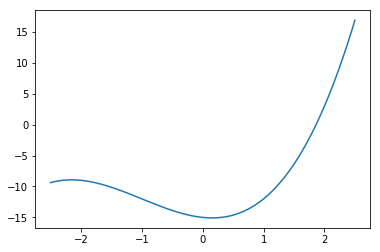

In [4]:
#1.1
#more than one minumum so non convex
#for this if u choose something close to zero it wont work
x=np.linspace(-2.5,2.5,1000)
plt.plot(x,x**3+3*x**2-x-15)
plt.show()

In [7]:
1.1
from scipy.optimize import newton,root
def part_1_1(x):
    return x**3+3*x**2-x-15
root_1_1_lambda=newton(lambda x:x**3+3*x**2-x-15,x0=0.25)
root_1_1_definfunc=newton(part_1_1,x0=0.25)#you can change x0 the but you cannot have zero as it will not converge
print('one root, using lambda, is {}'.format(root_1_1_lambda))
print('one root, using a defined function , is {}'.format(root_1_1_definfunc))

one root, using lambda, is 1.8622542887873788
one root, using a defined function , is 1.8622542887873788


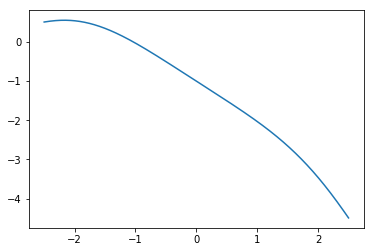

One root of problem 1.2 is -1.0357489513886242


In [10]:
1.2
z=np.linspace(-2.5,2.5,1000)
plt.plot(z,np.cos(z**2/4)-z-2)
plt.show()
#simple function should not matter
root_1_2_lambda=newton(lambda z: np.cos(z**2/4)-z-2,x0=-1)
print('One root of problem 1.2 is {}'.format(root_1_2_lambda))

In [13]:
1.3 #two varibles so n-dimension functions.So using the root functions since 2-D
#2-Dimensions, so we need to use te 'Power hybrid method', calling the root function.
def function_1_1(z):
    #z is an array of length 2, where z[0]=x, and z[1]=y
    #z[0] is an array not just a numbeer
    soln=np.zeros(2)
    soln[0]=3*z[0]+2*z[1]-9
    soln[1]=4*z[0]**2-z[1]+2
    return soln
root_1_3=root(function_1_1,x0=[0,0])
print(root_1_3)
print('\n')
print('Root for part 1_3 is {}'.format(root_1_3.x))

    fjac: array([[-0.57932524, -0.81509648],
       [ 0.81509648, -0.57932524]])
     fun: array([0., 0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-1.49988190e-11, -1.06603262e-11])
       r: array([-5.17843832,  0.07979233,  2.51040921])
  status: 1
 success: True
       x: array([0.625 , 3.5625])


Root for part 1_3 is [0.625  3.5625]


Problem 2: Minimization
====

**1.** Minimize 

$$\frac{(x−4)^2}{2} +\frac{(x−2)^2}{4}$$

**2.** Minimize on [-1,2]

$$3 \cos(4 x^2) \sin(2 x + 1)$$ 






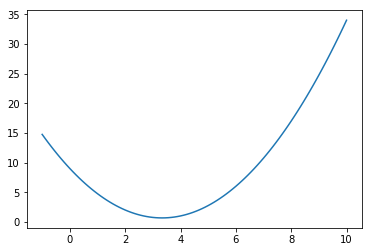

      fun: 0.6666666666666667
 hess_inv: array([[0.66666667]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([3.33333333])
our minimum is at [3.33333333], [0.66666667]


In [21]:
#2.1
from scipy.optimize import minimize
import math
x=np.linspace(-1,10,100)
plt.plot(x,(x-4)**2/2+(x-2)**2/4)
plt.show()
#use BFGS (call 'minimize' function)
def func(x):
    return((x-4)**2/2+(x-2)**2/4)
min_2_1_x=minimize(func,x0=4)
print(min_2_1_x)
print('our minimum is at {}, {}'.format(min_2_1_x.x,func(min_2_1_x.x)))

2.2
$$3 \cos(4 x^2) \sin(2 x + 1)$$

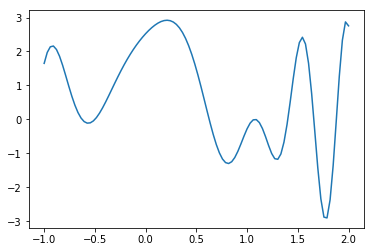

Minimum value of part 2.2 is [1.77409932].[-2.95884675]


In [27]:
#2.2 graph first. given bounds []
def obj(x):
    return 3*np.cos(4*x**2)*np.sin(2*x+1)
x=np.linspace(-1,2,100)
plt.plot(x,obj(x))
plt.show()
min_2_2=minimize(obj,x0=1.75,bounds=[(-1,2)])
min_2_2_x=min_2_2.x
min_2_2_y=min_2_2.fun
print('Minimum value of part 2.2 is {}.{}'.format(min_2_2_x,min_2_2_y))

Problem 3: Box Problem
====

You have a square piece of cardboard with the dimensions 3 ft by 4 ft. You cut a small amount (x) off of each corner to fold up the corners to make a box. Determine the height of the box that gives a maximum volume.

In [31]:
#the height of the box is x
#to use minimize function to maximize
#we only knw how to minimize so negativ since we are maximixing
def volume(x):
    h=x
    l=3-2*x
    w=4-2*x
    return -1*(l*w*h)#
#providing our function works
x=0.75
print(volume(x))
vol=minimize(volume,x0=0)
print('The maximum volume is {} in cubed'.format(vol.x))


-2.8125
The maximum volume is [0.56574182] in cubed
